In [25]:
library(Seurat)

In [26]:
library(dplyr)

In [36]:
eryp <- readRDS(file="../../data/intermediate/cite-seq/seurat-initial-qc.rds")

In [37]:
my_order <- c('Monocytes', 'Granulocytes', 'Megakaryocytes', 'MPP', 'EEP', 'CEP1', 'CEP2', 'ETD1', 'ETD2', 'ETD3', 'ETD4')

In [38]:
eryp@active.ident <- factor(x = eryp@active.ident, levels = my_order)

In [41]:
eryp <- subset(x=eryp, idents=my_order)

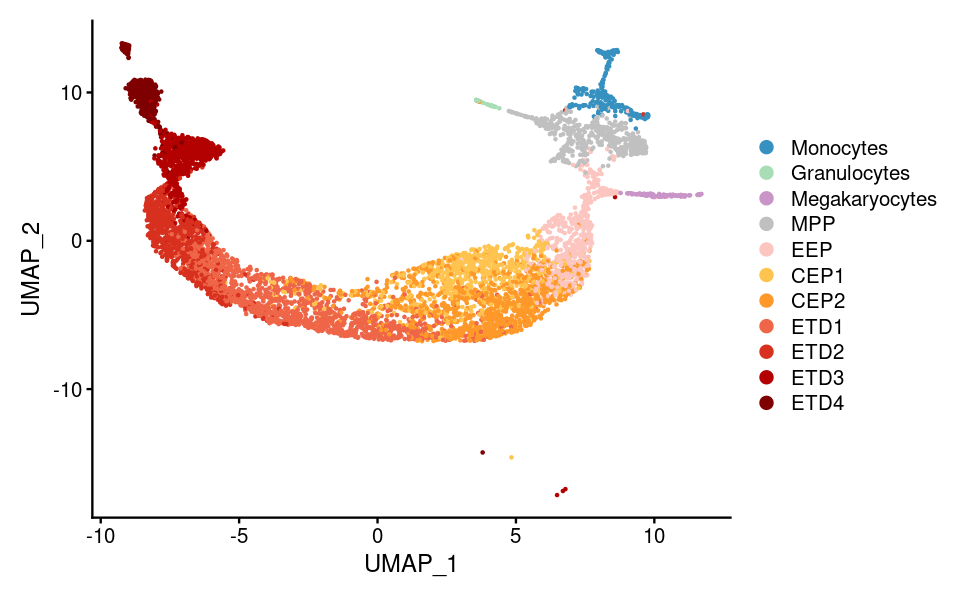

In [42]:
#pdf('../../out/figures/scrna-umap.pdf')

options(repr.plot.width=8, repr.plot.height=5)

DimPlot(eryp, reduction = "umap",
       cols=c(
                '#3690c0', #Mono
                '#a8ddb5', #Gran
                '#c994c7', #Meg
                '#c0c0c0', #MPP
                '#fcc5c0', #EEP
                '#fec44f', #CEP1
                '#fe9929', #CEP2
                '#ef6548', #ETD1
                '#d7301f', #ETD3
                '#b30000', #ETD3
                '#7f0000'  #ETD4
       ))

#dev.off()

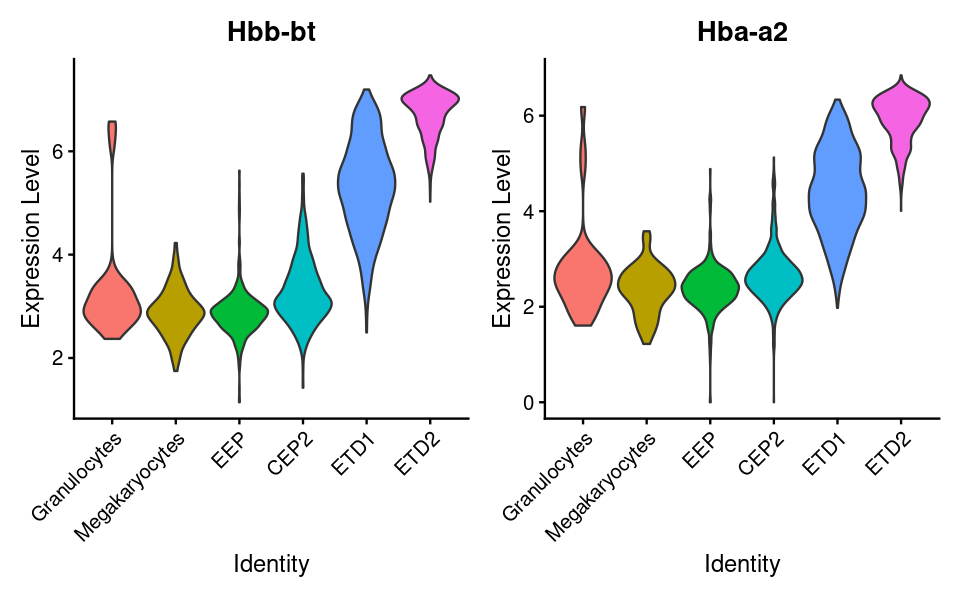

In [43]:
DefaultAssay(eryp) <- "RNA"
VlnPlot(object = eryp, features = c("Hbb-bt", "Hba-a2"), pt.size = 0,
       idents=c('Granulocytes', 'Megakaryocytes', 'EEP', 'CEP2', 'ETD1', 'ETD2'))

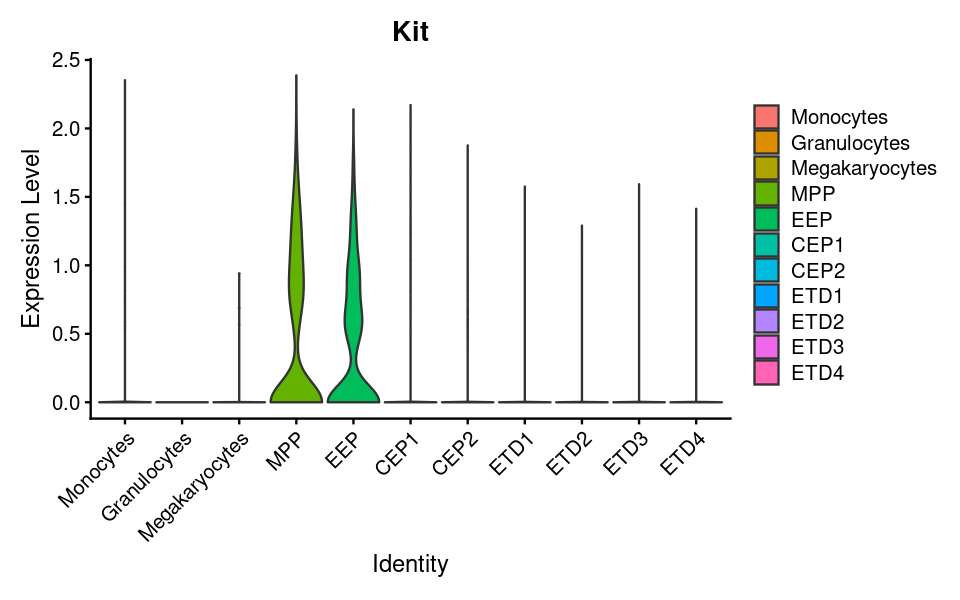

In [44]:
DefaultAssay(eryp) <- "RNA"
VlnPlot(object = eryp, features = c("Kit"), pt.size = 0)

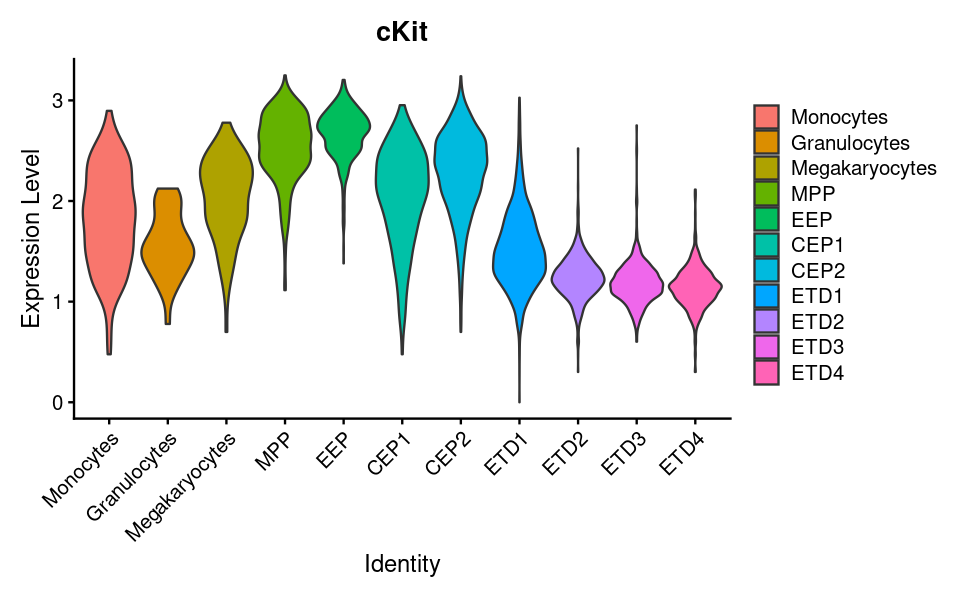

In [45]:
DefaultAssay(eryp) <- "CITE"
VlnPlot(object = eryp, features = c("cKit"), pt.size = 0)

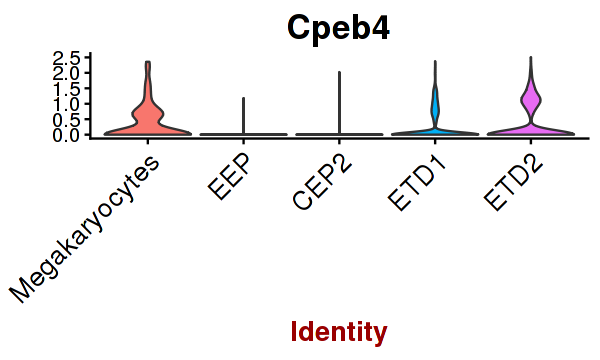

In [23]:
VlnPlot(object = eryp, features.plot = c("Cpeb4"),
       x.lab.rot = TRUE, point.size.use=0,
       ident.include=c('Megakaryocytes', 'EEP', 'CEP2', 'ETD1', 'ETD2'))

In [9]:
cluster.averages <- AverageExpression(eryp)

Finished averaging RNA for cluster Monocytes
Finished averaging RNA for cluster Granulocytes
Finished averaging RNA for cluster Megakaryocytes
Finished averaging RNA for cluster MPP
Finished averaging RNA for cluster EEP
Finished averaging RNA for cluster CEP1
Finished averaging RNA for cluster CEP2
Finished averaging RNA for cluster ETD1
Finished averaging RNA for cluster ETD2
Finished averaging RNA for cluster ETD3
Finished averaging RNA for cluster ETD4


In [24]:
head(cluster.averages)

,Monocytes,Granulocytes,Megakaryocytes,MPP,EEP,CEP1,CEP2,ETD1,ETD2,ETD3,ETD4
Sox17,0.0000000,0.0000000,0.0000000,0.002097154,0.0000000,0.0000000,0.000645021,0.002170213,0.001730959,0.004426832,0.003614976
Mrpl15,1.2651160,0.8370012,1.1883375,1.566794804,2.3769746,2.1536713,2.259171410,1.419401353,0.499489464,0.335715473,0.281601192
Lypla1,0.8156466,1.1629324,0.7333235,0.874176386,0.6471405,0.4638509,0.388046760,0.167906964,0.146929912,0.084328910,0.126740045
Tcea1,0.5248425,0.2843686,0.8413165,0.566001129,0.7279920,0.9380961,0.800934662,0.924609757,0.759455999,0.494872771,0.181065869
Atp6v1h,0.3973127,0.2122202,0.3308107,0.331066033,0.2564560,0.2542472,0.247709274,0.197893832,0.085036938,0.083937977,0.073734490
Rb1cc1,0.2489224,0.3659165,0.2568504,0.279416305,0.2475515,0.2283183,0.203412923,0.290240936,0.443279088,0.706343869,0.041477171


In [10]:
write.csv(cluster.averages, '../../data/processed/cite-seq/seurat_cluster_averages.csv')

In [27]:
svg('../../out/figures/scrna-markers.svg')
FeaturePlot(eryp, features.plot = c("Hlf", "Ngp", "Pf4", "Csf1r", 'Vim', "Hbb-bt"),
            reduction.use = "umap", no.legend = FALSE,
            min.cutoff = "q05", max.cutoff = "q95", nCol=2)
dev.off()

png 
  2

In [33]:
svg('../../out/figures/scrna-cite.svg', width=14, height=3)
options(repr.plot.width=10, repr.plot.height=3)
FeaturePlot(eryp, features.plot = c("CITE_cKit", "CITE_CD71", "CITE_Ter119"),
                        reduction.use = "umap", no.legend = FALSE,
            cols.use = c("gray", "blue"),
            min.cutoff = "q05", max.cutoff = "q95", nCol=3)
dev.off()

png 
  2

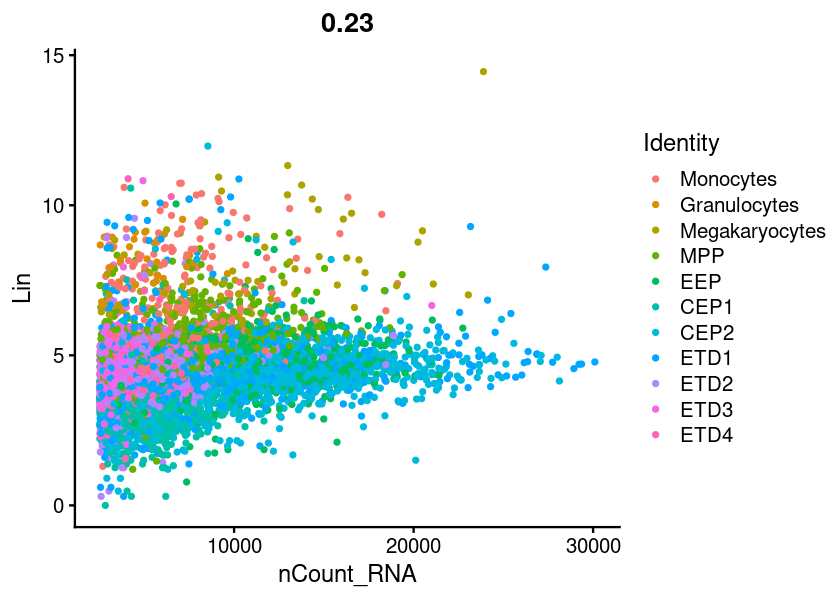

In [46]:
options(repr.plot.width=7, repr.plot.height=5)
DefaultAssay(eryp) <- "CITE"
FeatureScatter(eryp, "nCount_RNA", "Lin")

In [56]:
lin_pos_cells <- subset(eryp, Lin > 6)
lin_neg_cells <- subset(eryp, Lin <= 6)

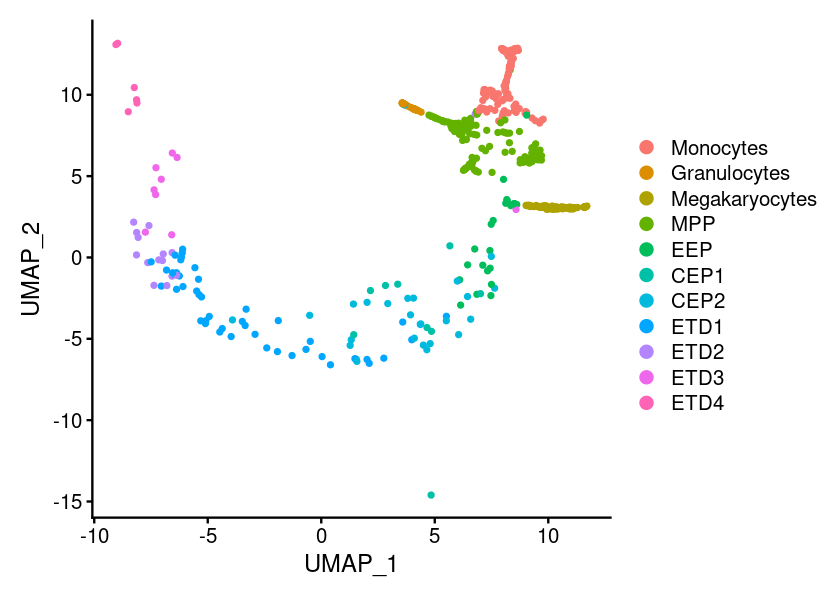

In [57]:

DimPlot(object = lin_pos_cells, reduction = "umap")


In [53]:
CD71_low <- 1.6
CD71_medium <- 2.2
Ter119_S1 <- 1.25
Ter119_S2 <- 1.8

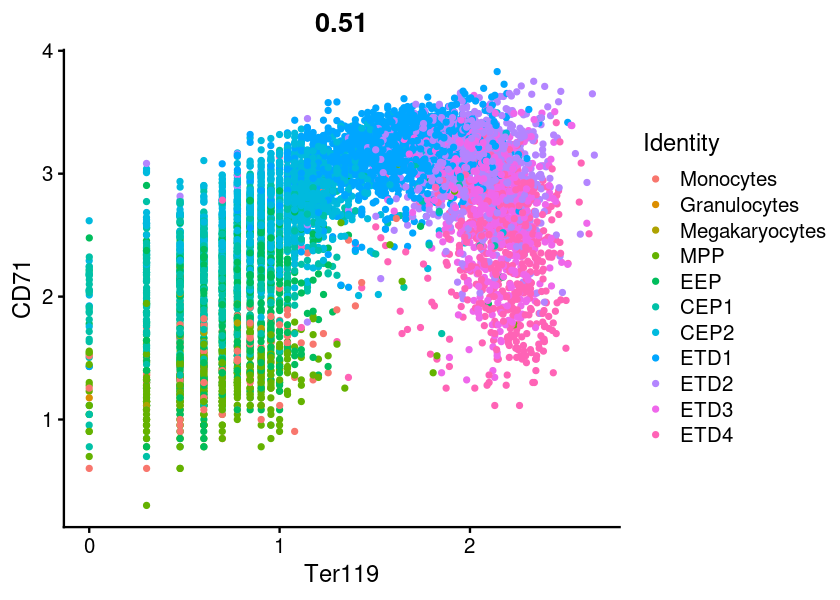

In [58]:
FeatureScatter(lin_neg_cells, "Ter119", "CD71")

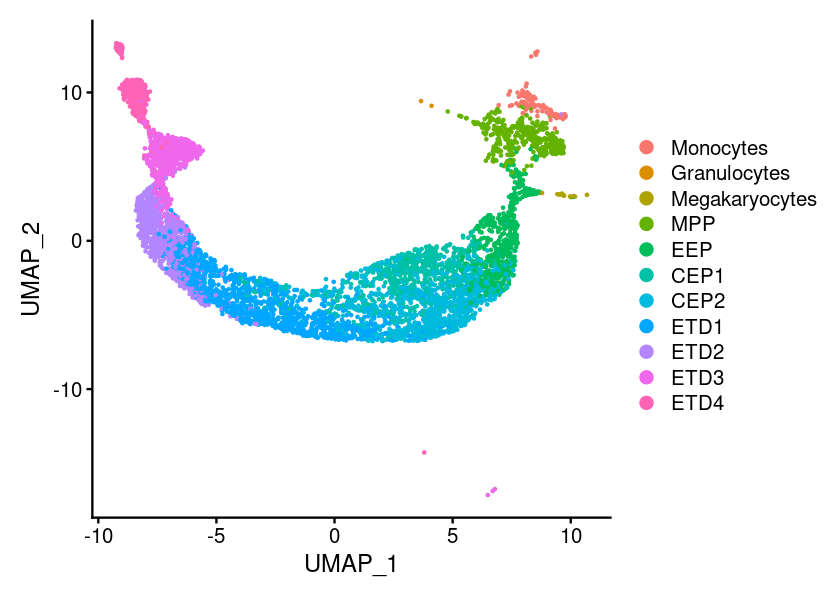

In [59]:
DimPlot(object = lin_neg_cells, reduction = "umap")


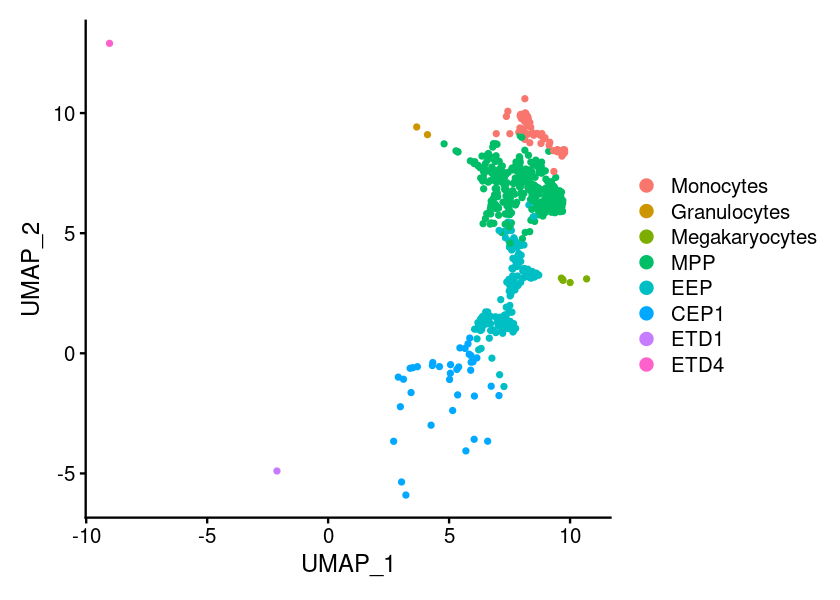

In [62]:
S0_low <- subset(x=lin_neg_cells, CD71 < CD71_low & Ter119 < Ter119_S1)

DimPlot(object = S0_low, reduction = "umap")

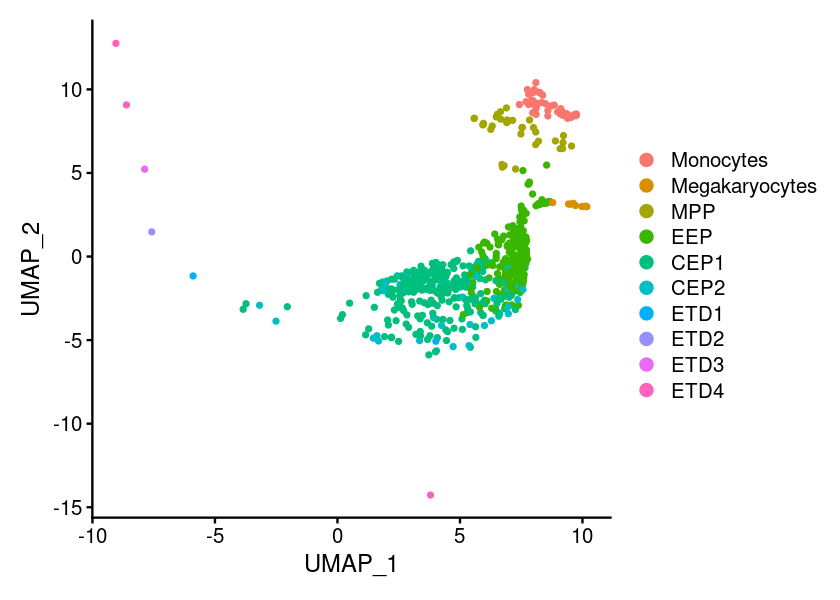

In [63]:
S0_medium <- subset(lin_neg_cells, CD71 >= CD71_low & CD71 < CD71_medium & Ter119 < Ter119_S1)

DimPlot(object = S0_medium, reduction = "umap")

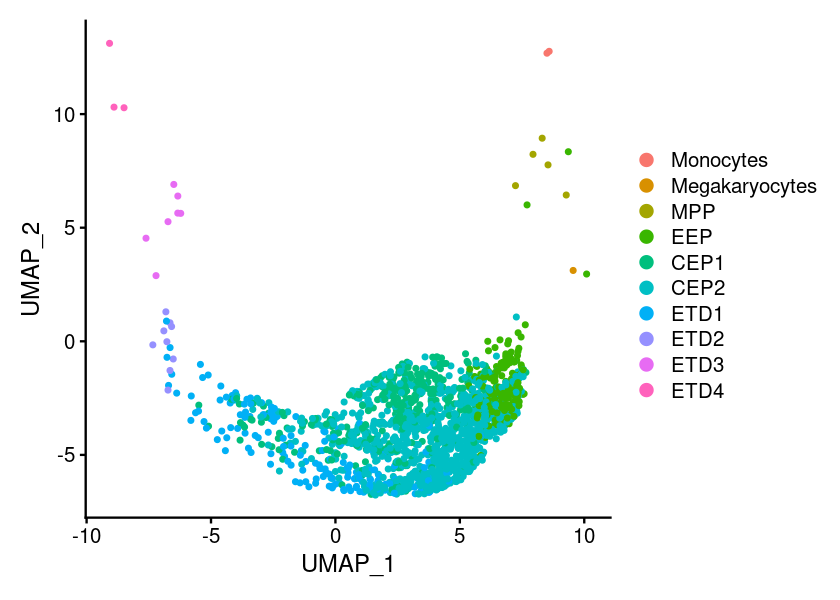

In [64]:
S1 <- subset(lin_neg_cells, CD71 >= CD71_medium & Ter119 < Ter119_S1)

DimPlot(object = S1, reduction = "umap")


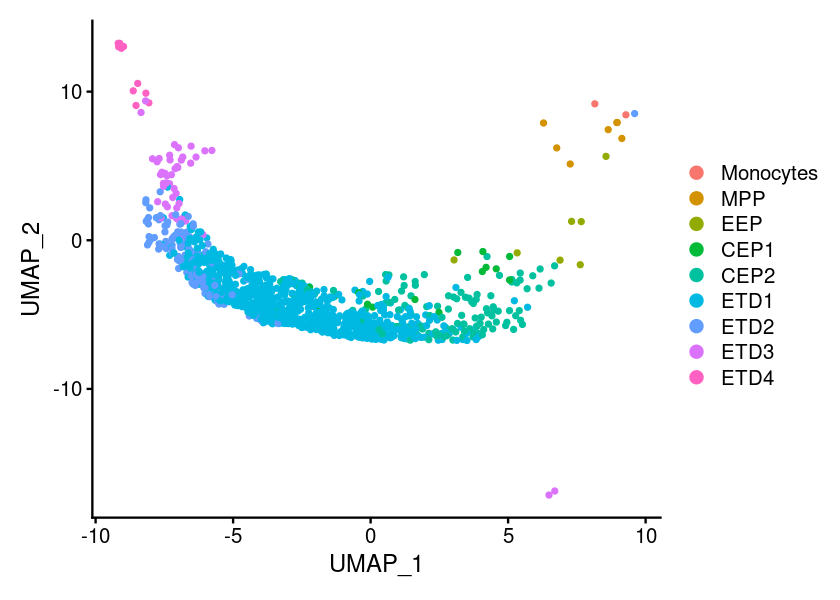

In [67]:
S2 <- subset(lin_neg_cells, CD71 >= CD71_medium & Ter119 >= Ter119_S1 & Ter119 < Ter119_S2)

DimPlot(object = S2, reduction = "umap")

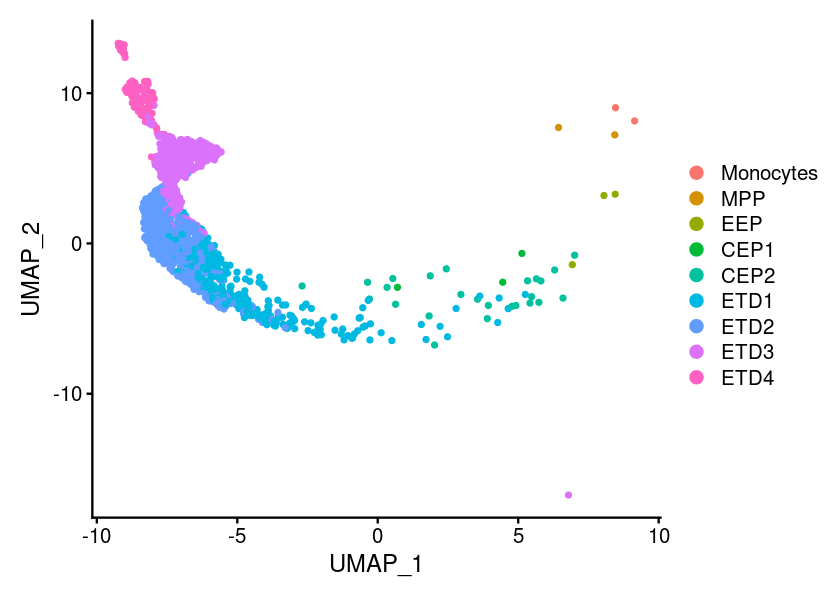

In [68]:
S3 <- subset(lin_neg_cells, CD71 >= 2.7 & Ter119 >= Ter119_S2)

DimPlot(object = S3, reduction = "umap")

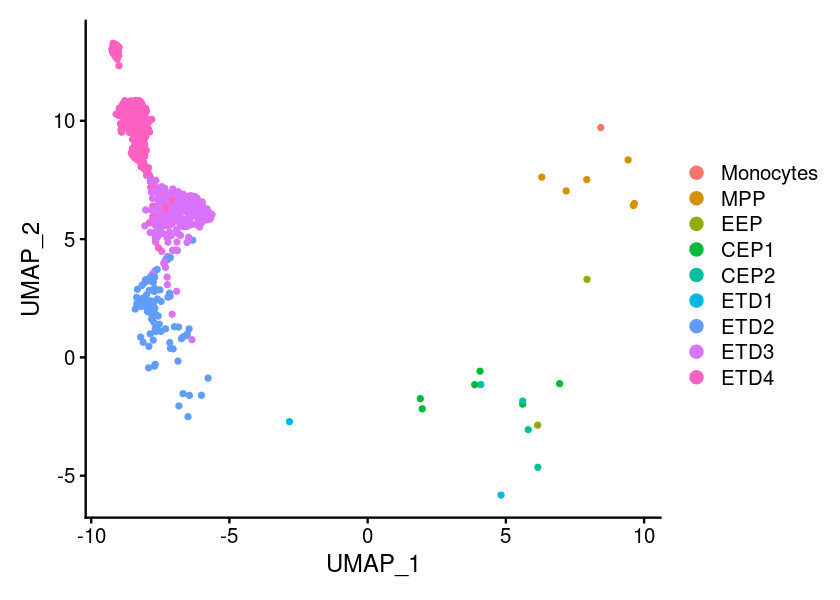

In [69]:
S4S5 <- subset(lin_neg_cells, CD71 < 2.7 & Ter119 >= Ter119_S2)

DimPlot(object = S4S5, reduction = "umap")

In [76]:
cite_ident <- data.frame(eryp@active.ident)

In [80]:
cite_ident$eryp.active.ident <- as.character(cite_ident$eryp.active.ident)

In [88]:
cite_ident$eryp.active.ident <- 'None'

In [93]:
cite_ident[names(S0_low@active.ident), 'eryp.active.ident'] <- 'S0-low'
cite_ident[names(S0_medium@active.ident), 'eryp.active.ident'] <- 'S0-med'
cite_ident[names(S1@active.ident), 'eryp.active.ident'] <- 'S1'
cite_ident[names(S2@active.ident), 'eryp.active.ident'] <- 'S2'
cite_ident[names(S3@active.ident), 'eryp.active.ident'] <- 'S3'
cite_ident[names(S4S5@active.ident), 'eryp.active.ident'] <- 'S4S5'

In [97]:
colnames(cite_ident) <- 'cite_gates'

In [108]:
eryp <- AddMetaData(eryp, cite_ident, col.name="cite_gates")

In [109]:
eryp <- SetIdent(eryp, value="cite_gates")

In [110]:
my_order <- c('S0-low', 'S0-med', 'S1', 'S2', 'S3', 'S4S5')

In [112]:
eryp <- subset(eryp, idents=my_order)

In [113]:
eryp@active.ident <- factor(x = eryp@active.ident, levels = my_order)

In [118]:
library(ggplot2)

In [121]:
png('../../out/figures/kit-citeseq-rna.png')

DefaultAssay(eryp) <- "RNA"
baseplot <- VlnPlot(object = eryp, features = c("Kit"), pt.size = 0)
baseplot + labs(title = "Kit RNA level")

dev.off()

png 
  2

In [122]:
png('../../out/figures/kit-citeseq-adt.png')
DefaultAssay(eryp) <- "CITE"
VlnPlot(object = eryp, features = c("cKit"), pt.size = 0)

dev.off()

png 
  2